<a href="https://colab.research.google.com/github/jennifergc/fits_plotting_tool/blob/main/Fits_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from astropy.io import fits
#import matplotlib.pyplot as pltfrom astropy.io import fits
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display
from pathlib import Path
import matplotlib as mpl

## Se prueba el notebook para graficar

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


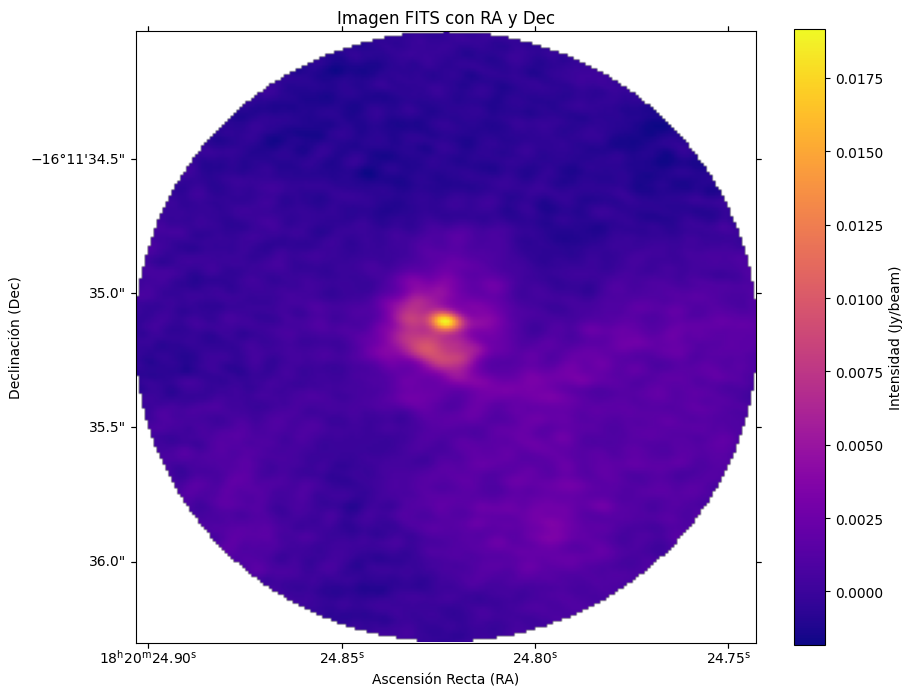

In [3]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Abrir el archivo FITS
hdul = fits.open('ALMA01582922_CONTI_P2019_cutted.fits')

# Extraer los datos y el WCS del header
datos_2d = hdul[0].data[0, 0, :, :]  # Reducir dimensiones
wcs = WCS(hdul[0].header).celestial  # Tomar solo las coordenadas celestiales

# Graficar usando WCS
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': wcs})

# Mostrar la imagen
im = ax.imshow(datos_2d, cmap='plasma', origin='lower')

# Añadir barra de color
cbar = plt.colorbar(im, ax=ax, pad=0.05, label='Intensidad (Jy/beam)')

# Etiquetas de los ejes en RA y Dec
ax.set_xlabel('Ascensión Recta (RA)')
ax.set_ylabel('Declinación (Dec)')

# Título opcional
plt.title('Imagen FITS con RA y Dec')

# Mostrar la gráfica
plt.show()

# Cerrar el archivo FITS
hdul.close()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


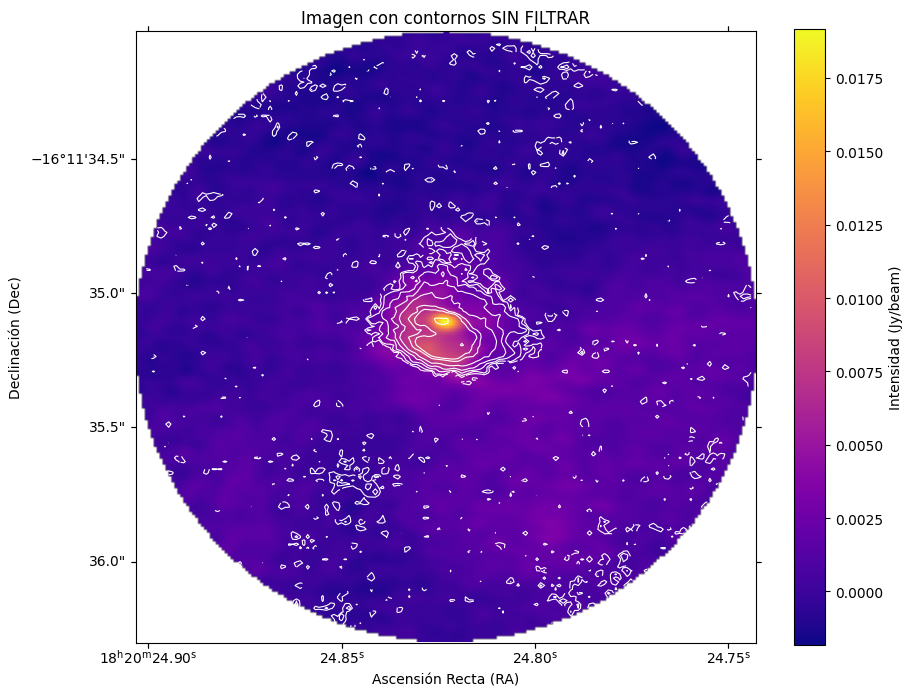

In [4]:
#HACIENDO LOS CONTORNOS DESDE CERO

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

# Abrir el archivo de la imagen base
hdul_base = fits.open('ALMA01582922_CONTI_P2019_cutted.fits')
datos_base = hdul_base[0].data[0, 0, :, :]  # Reducir dimensiones
wcs_base = WCS(hdul_base[0].header).celestial

# Abrir el archivo del momento 0
hdul_moment0 = fits.open('ALMB00094768_m0_3sigma.fits')
datos_moment0 = hdul_moment0[0].data[0, 0, :, :]  # Reducir dimensiones
wcs_moment0 = WCS(hdul_moment0[0].header).celestial

# Definir el sigma conocido
sigma = 3e-3  # Jy/beam

# Crear niveles de contorno específicos
#niveles_contorno = np.array([-3, 1, 3, 5, 10, 20, 40]) * sigma  # Multiplicamos por sigma
niveles_contorno = np.array([-3,3,5,10,20,40,80,100,150]) * sigma
#niveles_contorno = np.array([-1,1]) * sigma


# Graficar la imagen base
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': wcs_base})
im = ax.imshow(datos_base, cmap='plasma', origin='lower')

# Añadir contornos del momento 0
contornos = ax.contour(datos_moment0, levels=niveles_contorno, colors='white', linewidths=0.8, transform=ax.get_transform(wcs_moment0))

# Etiquetar contornos
#ax.clabel(contornos, inline=True, fontsize=8, fmt='%.2e')  # Formato científico para los niveles

# Añadir barra de color para la imagen base
cbar = plt.colorbar(im, ax=ax, pad=0.05, label='Intensidad (Jy/beam)')

# Etiquetas de los ejes
ax.set_xlabel('Ascensión Recta (RA)')
ax.set_ylabel('Declinación (Dec)')

# Título
#plt.title('Imagen con contornos específicos (niveles en múltiplos de $3 \,mJy/beam$)')
plt.title('Imagen con contornos SIN FILTRAR')
# Mostrar la gráfica
# Guardar la imagen en diferentes formatos
plt.savefig("imagen_contornos.png", dpi=300, bbox_inches='tight')  # PNG
plt.show()

#plt.savefig("imagen_contornos.pdf", dpi=300, bbox_inches='tight')  # PDF
#plt.savefig("imagen_contornos.eps", dpi=300, bbox_inches='tight')  # EPS (para publicaciones)
#plt.savefig("imagen_contornos.svg", dpi=300, bbox_inches='tight')  # SVG (para gráficos vectoriales)


# Cerrar los archivos FITS
hdul_base.close()
hdul_moment0.close()


## Se crea una clase y se construye un script reutilizable: fits_plotter.py

In [2]:
# CREANDO UN SCRIPT DE PYTHON PARA USARLO PERMANENTEMENTE
from fits_plotter import FITSPlotter

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


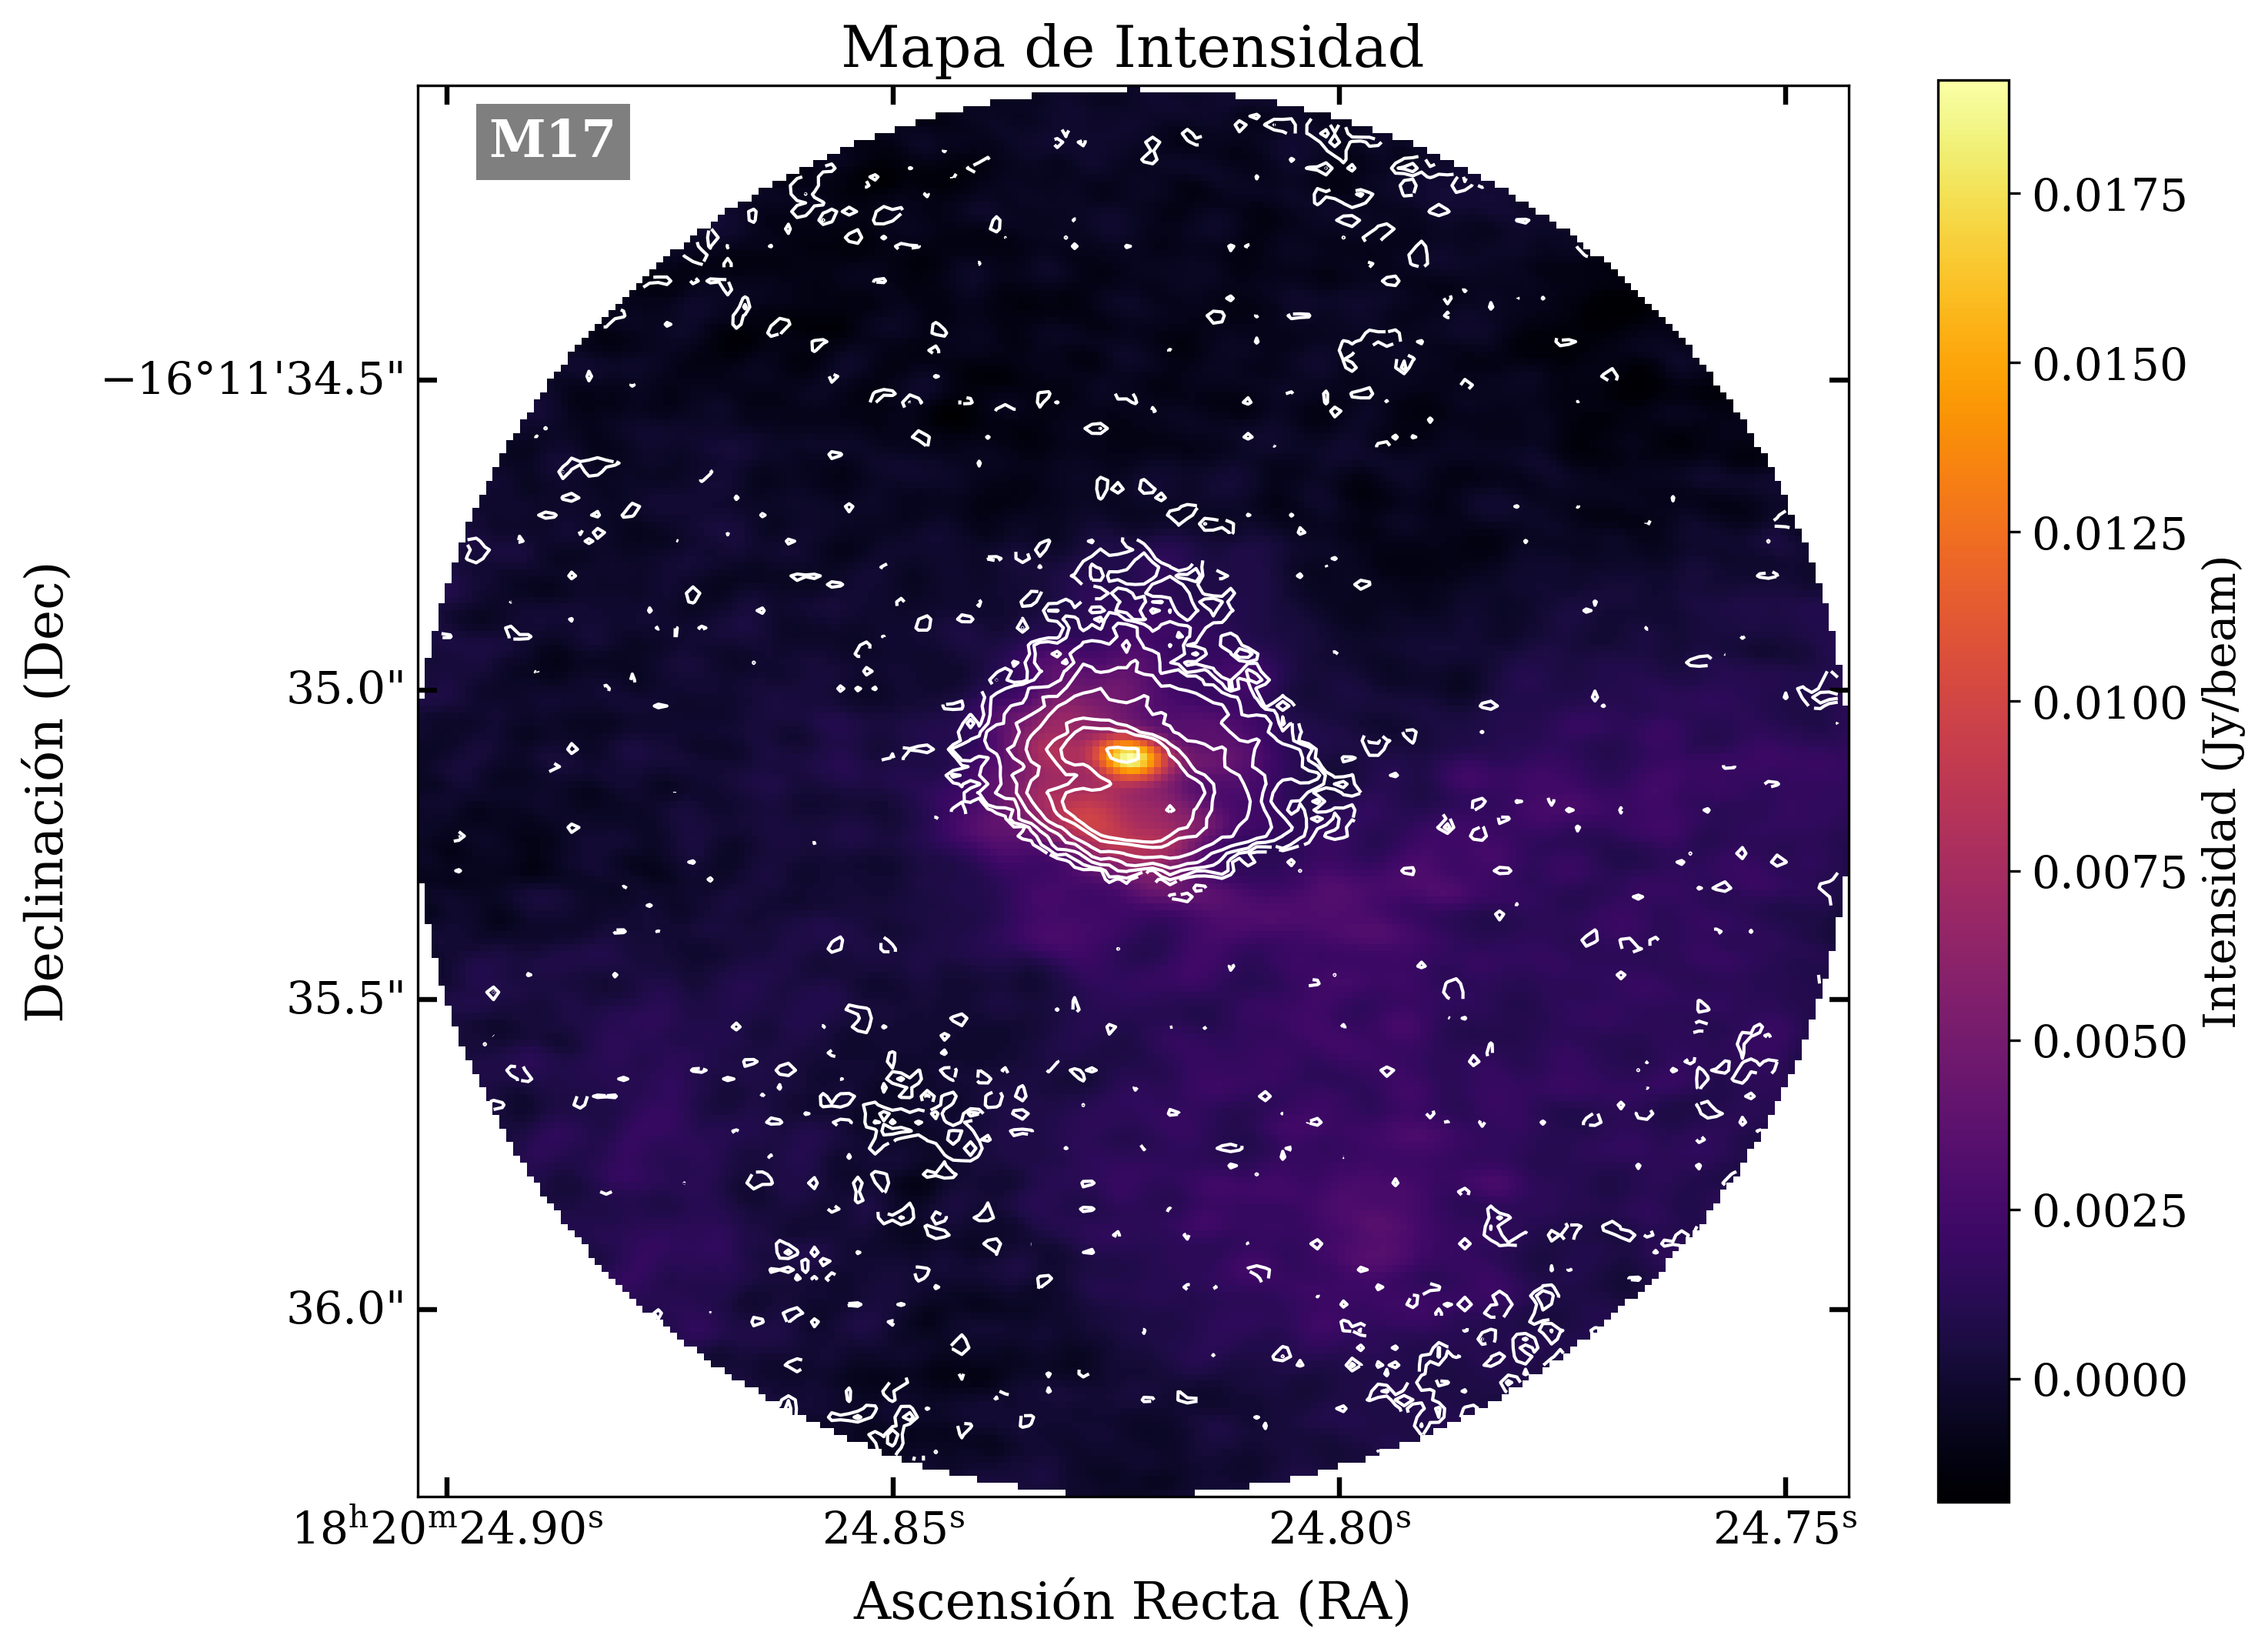

Archivos FITS cerrados.


In [3]:
# Crear un objeto para graficar
plotter = FITSPlotter('ALMA01582922_CONTI_P2019_cutted.fits', 'ALMB00094768_m0_3sigma.fits')
plotter.plot(contour_levels=[-3, 3, 5, 10, 20, 40, 80, 100, 150])
#EJEMPLO DE VARIACIÓN
#plotter.plot(contour_levels=None, save_as=None, title=None, object_name="")
plotter.close()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


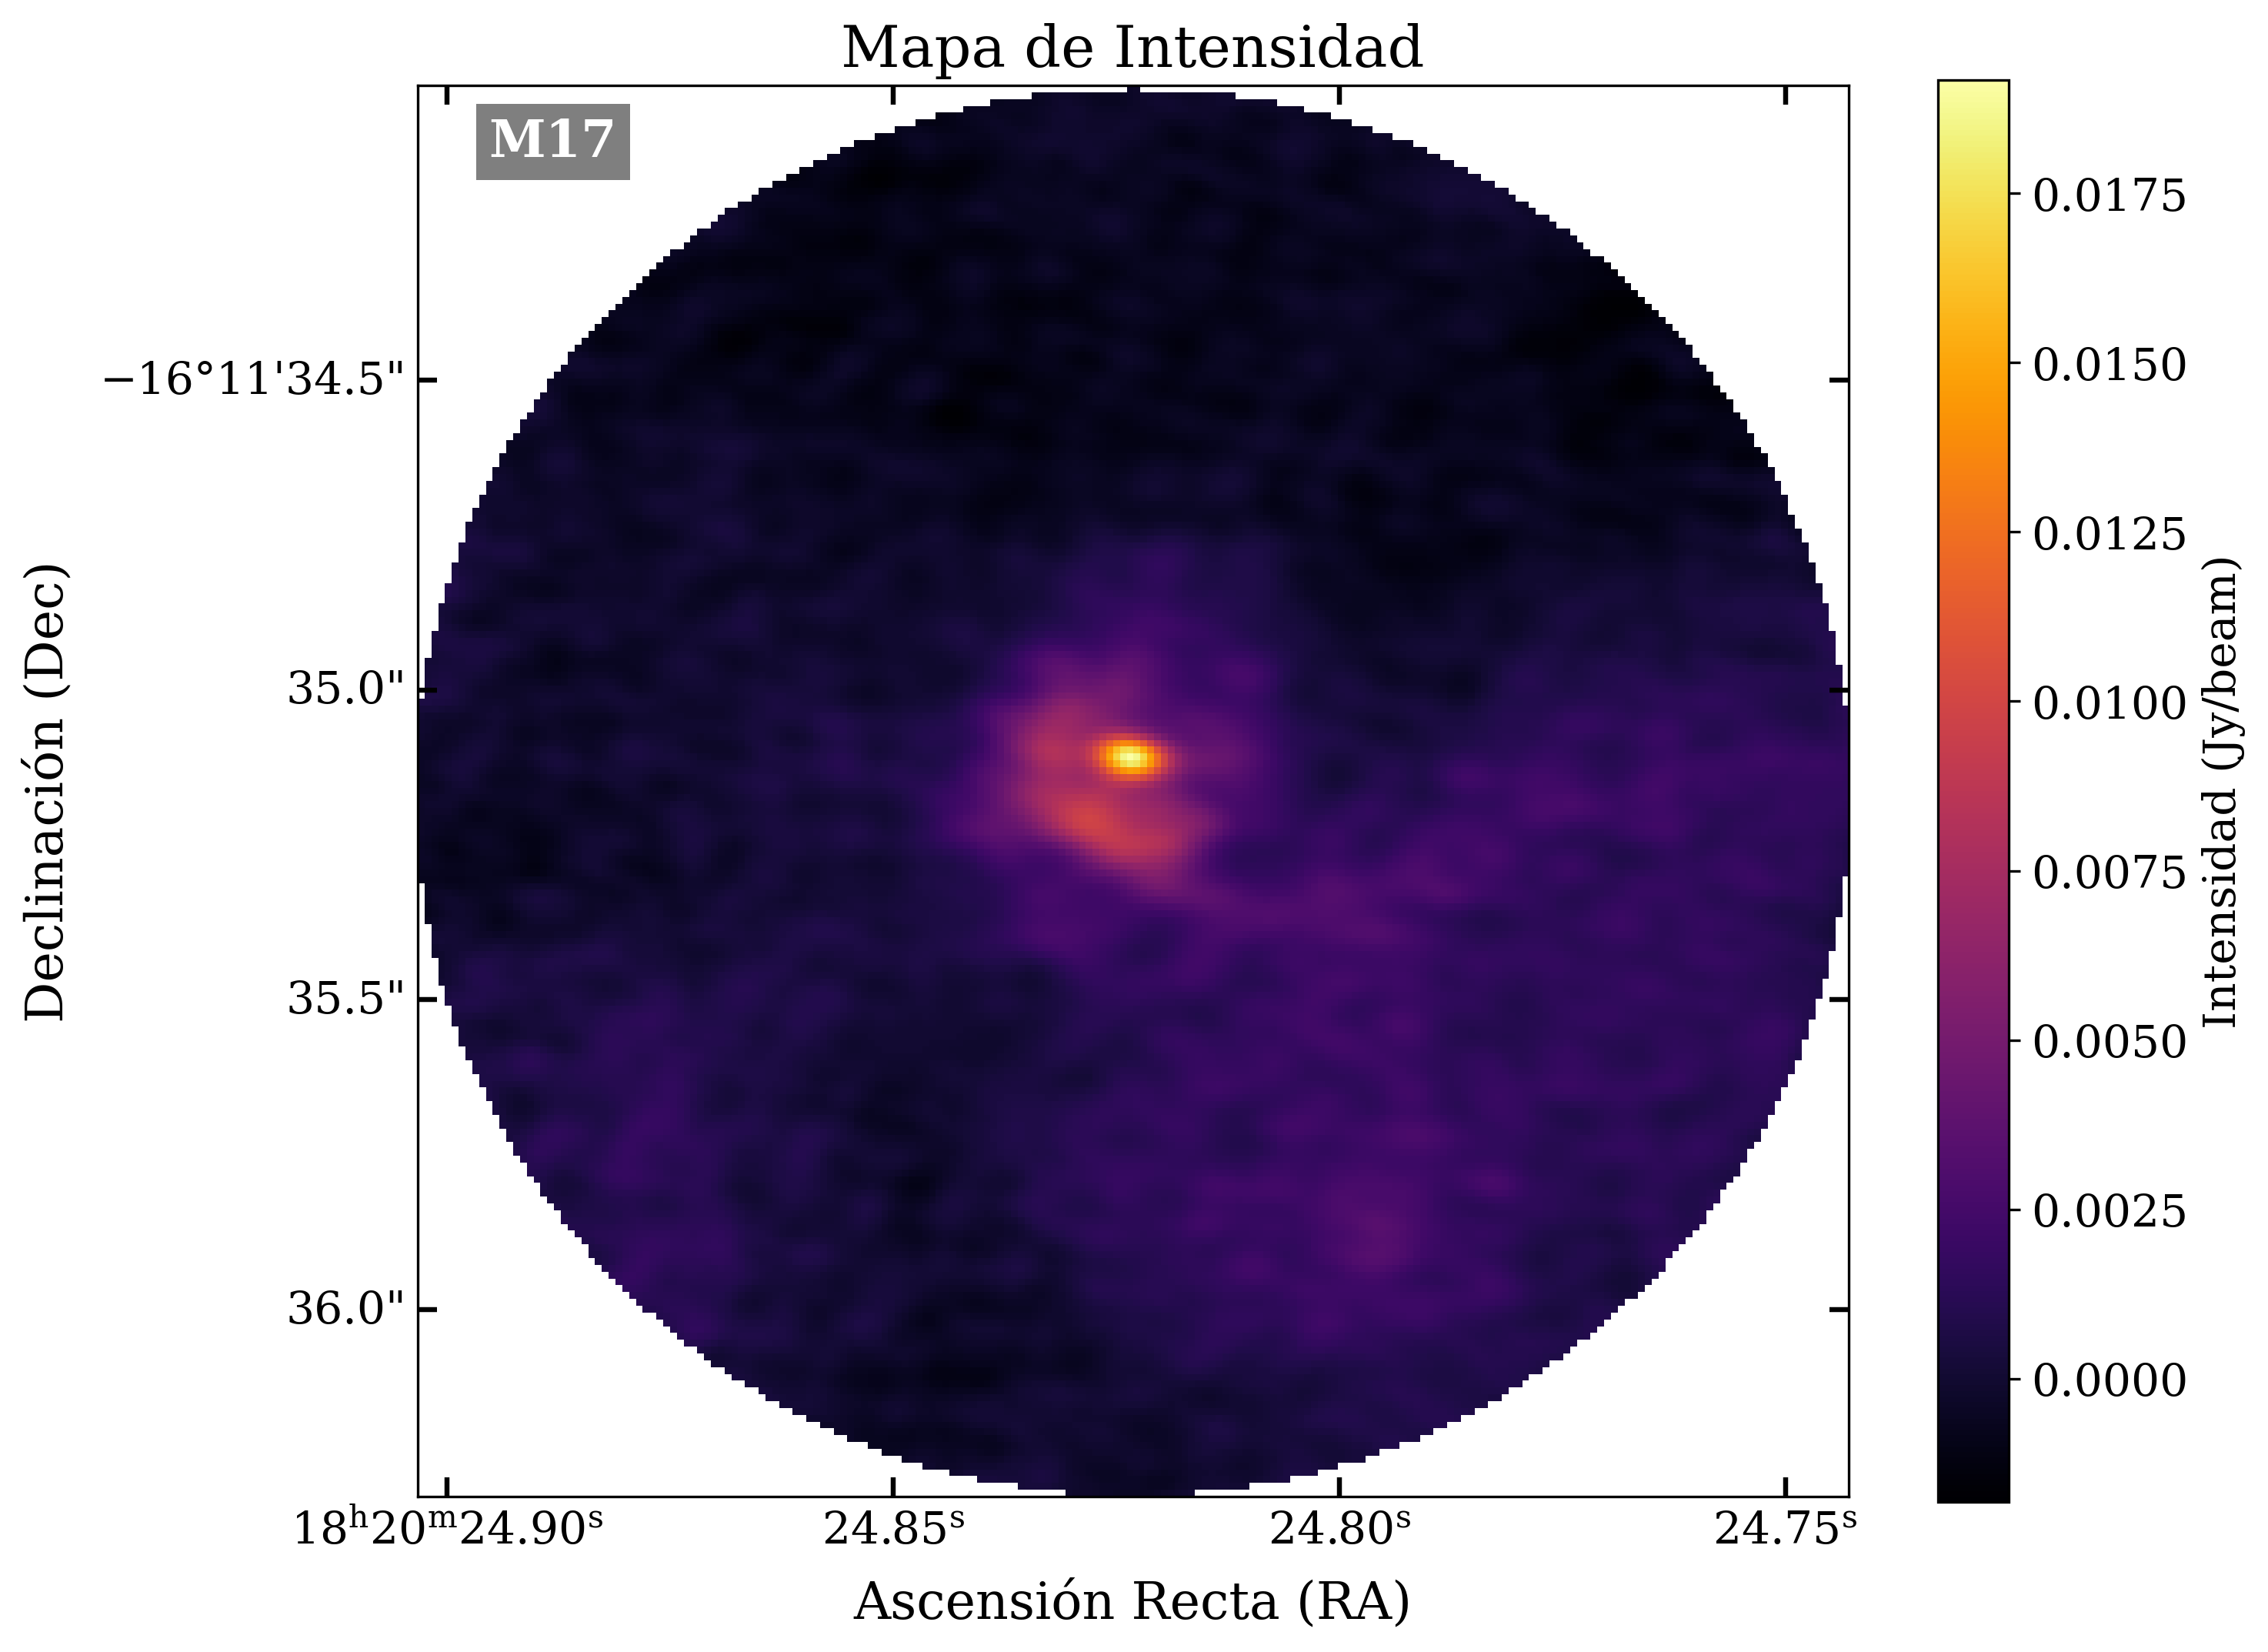

Archivos FITS cerrados.


In [4]:
# Crear un objeto para graficar
plotter = FITSPlotter('ALMA01582922_CONTI_P2019_cutted.fits')
plotter.plot()
#EJEMPLO DE VARIACIÓN
#plotter.plot(contour_levels=None, save_as=None, title=None, object_name="")
plotter.close()

# CASA CONTORNOS *casa_contornos2.py*

In [3]:
import subprocess

In [4]:
# Cálculo de contornos usando CASA (script casa_contornos2.py)
cmd = [
    "/home/jennifer/casa/casa-6.6.5-31-py3.10.el8/bin/casa",
    "--nologger", "--nogui", "-c",
    "/home/jennifer/fits_plotting_tool/casa_contornos2.py", "/home/jennifer/casa/M17_P2019/ALMA01480118_m0_nomask.fits","0", "0.007918", "-3,3,5,10,20,50,90,150", "ALMA01480118__m0_contours.fits"
]
#"Uso: casa --nologger --nogui -c script_contornos.py <fits_file> <moment> <sigma> <multipliers> <output_fits>"
subprocess.run(cmd)

#"Uso: ["casa", "--nologger", "--nogui", "-c", "script_contornos.py", 
#            fits_file, str(moment), str(sigma), multipliers, output_fits]
# 
# subprocess.run(comando)


optional configuration file not found, continuing CASA startup without it

No event loop hook running.
Using matplotlib backend: module://matplotlib_inline.backend_inline
measures_update ... acquiring the lock ... 
The latest measures version was checked recently in /home/jennifer/.casa/data, using version WSRT_Measures_20250219-160001.ztar
CASA 6.6.5.31 -- Common Astronomy Software Applications [6.6.5.31]
Directorio imagen_casa.im eliminado para evitar conflictos de sobrescritura.
Directorio contornos.im eliminado para evitar conflictos de sobrescritura.
Archivo -3,3,5,10,20,50,90,150 eliminado para evitar conflictos de sobrescritura.
Sigma estimado: 0.22527051325446132
Proceso completado: Contornos generados para momento 0 con sigma=0.22527051325446132 y múltiplos [0.007918] <3


CompletedProcess(args=['/home/jennifer/casa/casa-6.6.5-31-py3.10.el8/bin/casa', '--nologger', '--nogui', '-c', '/home/jennifer/fits_plotting_tool/casa_contornos2.py', '/home/jennifer/casa/M17_P2019/ALMA01480118_m0_nomask.fits', '0', '0.007918', '-3,3,5,10,20,50,90,150', 'ALMA01480118__m0_contours.fits'], returncode=0)

# FITS_PLOTTER 4 PRUEBA DE uso

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


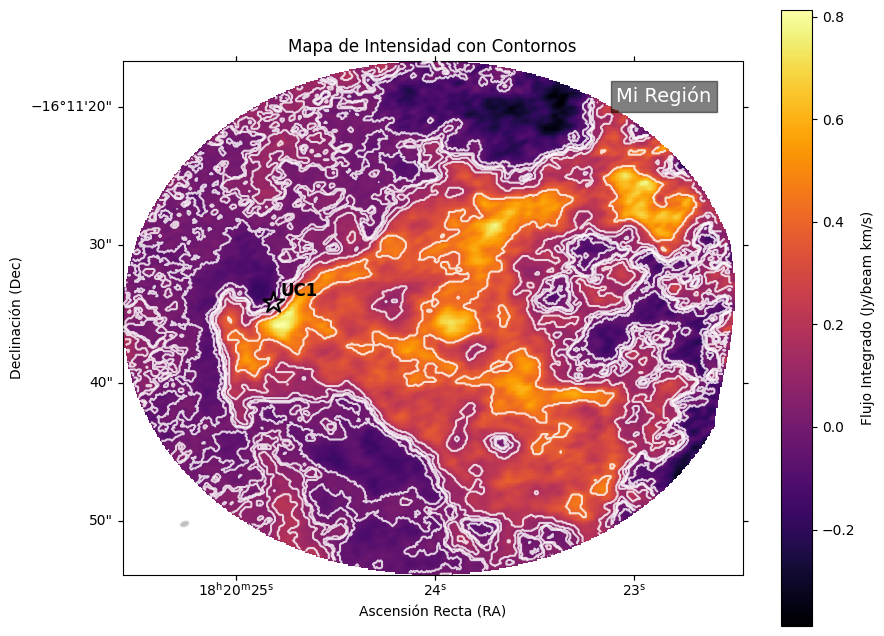

In [3]:
from fits_plotter4 import FITSPlotter

# Definir los archivos FITS
imagen_base = "/home/jennifer/casa/M17_P2019/ALMA01480118_m0_nomask.fits" 
imagen_contornos = "/home/jennifer/Documentos/radio_analysis_uc1/ALMA01480118__m0_contours.fits" 

plotter = FITSPlotter(image_fits=imagen_base, contour_fits=imagen_contornos, moment="m0", region_label="Mi Región")

plotter.plot(title="Mapa de Intensidad con Contornos", save_as=None)


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


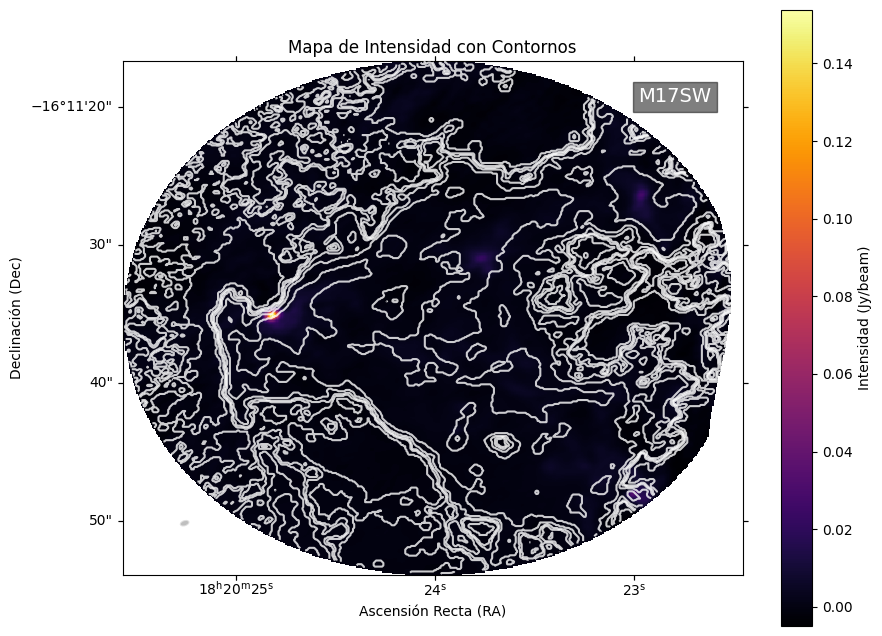

In [1]:
from fits_plotter4 import FITSPlotter

#imagen_base = "/home/jennifer/casa/M17_P2019/ALMA01480118_m0_nomask.fits" 
imagen_base = "/home/jennifer/casa/M17_P2019/ALMA01480123_cut.fits" 

imagen_contornos = "/home/jennifer/Documentos/radio_analysis_uc1/ALMA01480118__m0_contours.fits" 

# Crear una instancia de FITSPlotter
plotter = FITSPlotter(image_fits=imagen_base, contour_fits=imagen_contornos, moment="continuo", region_label="M17SW")

plotter.plot(title="Mapa de Intensidad con Contornos", save_as=None) 
